In [1]:
cases1 = {
    'all mismatch': {
        'R': (120,120,120),
        'I': (30,30,30),
        'O': (20,20,20)
    },
    'mismatch in j and i': {
        'R': (120,120,120),
        'I': (30,30,20),
        'O': (20,20,20)
    },
    'mismatch in i only': {
        'R': (120,120,120),
        'I': (30,20,20),
        'O': (20,20,20)
    },
    # 'all equal': {
    #    'R': (120,120,120),
    #    'I': (20,20,20),
    #    'O': (20,20,20)
    #}
}
cases = {
    'mismatch in k,j,i': {
        'R': (240,240,240),
        'I': (30,30,30),
        'O': (20,20,20)
    },
    'mismatch in j,i': {
        'R': (240,240,240),
        'I': (30,30,20),
        'O': (20,20,20)
    },
    'mismatch in i': {
        'R': (240,240,240),
        'I': (30,20,20),
        'O': (20,20,20)
    },
    # 'all equal': {
    #    'R': (120,120,120),
    #    'I': (20,20,20),
    #    'O': (20,20,20)
    #}
}

In [2]:
def baseline_seek_model(args):
    R, I, O = args["R"], args["I"], args["O"]
    p = list()
    d = list()
    for i in range(3):
        p.append(list())
        d.append(list())

        v_in = 0
        while v_in < R[i]: # does not contain last one
            if v_in != 0: # does not contain 0
                p[i].append(v_in)
                d[i].append(v_in)
            v_in += I[i]

        v_out = 0
        while v_out < R[i]: # does not contain last one
            if v_out not in p[i] and v_out != 0: # does not contain 0
                p[i].append(v_out)
            elif v_out in d[i]:
                d[i].remove(v_out)
            v_out += O[i]
    
    print(f'p: {p}')
    
    print(f'd: {d}')
    d = [len(d[i]) for i in range(len(d))]
    print(f'd: {d}')
    
    alpha = [1 if d[i] > 0 else 0 for i in range(len(d))]
    print(f'alpha: {alpha}')
    
    s_read = tuple([r/i for r, i in zip(R, I)])
    s_read = s_read[0] * s_read[1] * s_read[2]
    print(f'sread: {s_read}')
    
    nk = R[2]/I[2]
    nj = R[1]/I[1]
    print(f'nk: {nk}')
    print(f'nj: {nj}')
    
    case1 = (d[2]+1)*R[0]*R[1]*alpha[2]
    case2 = (d[1]+1)*R[0]*nk*(1-alpha[2])*alpha[1]
    case3 = (d[0]+1)*nj*nk*(1-alpha[2])*(1-alpha[1]*alpha[0])
    s_write = case1 + case2 + case3
    nb_outfiles = (len(p[0])-1)*(len(p[1])-1)*(len(p[2])-1)*(1-alpha[0])*(1-alpha[1])*(1-alpha[2])
    print(f'case1: {case1}')
    print(f'case2: {case2}')
    print(f'case3: {case3}')
    print(f'swrite: {s_write}')
    print(f'nb_outfiles: {nb_outfiles}')
    
    s = s_read + s_write + nb_outfiles
    print(f'\nresult: s={s}')
    return s

In [3]:
results = list()
for name, data in cases.items():
    print(f'\nProcessing case {name}')
    res = baseline_seek_model(data)
    results.append(res)


Processing case mismatch in k,j,i
p: [[30, 60, 90, 120, 150, 180, 210, 20, 40, 80, 100, 140, 160, 200, 220], [30, 60, 90, 120, 150, 180, 210, 20, 40, 80, 100, 140, 160, 200, 220], [30, 60, 90, 120, 150, 180, 210, 20, 40, 80, 100, 140, 160, 200, 220]]
d: [[30, 90, 150, 210], [30, 90, 150, 210], [30, 90, 150, 210]]
d: [4, 4, 4]
alpha: [1, 1, 1]
sread: 512.0
nk: 8.0
nj: 8.0
case1: 288000
case2: 0.0
case3: 0.0
swrite: 288000.0
nb_outfiles: 0

result: s=288512.0

Processing case mismatch in j,i
p: [[30, 60, 90, 120, 150, 180, 210, 20, 40, 80, 100, 140, 160, 200, 220], [30, 60, 90, 120, 150, 180, 210, 20, 40, 80, 100, 140, 160, 200, 220], [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]]
d: [[30, 90, 150, 210], [30, 90, 150, 210], []]
d: [4, 4, 0]
alpha: [1, 1, 0]
sread: 768.0
nk: 12.0
nj: 8.0
case1: 0
case2: 14400.0
case3: 0.0
swrite: 14400.0
nb_outfiles: 0

result: s=15168.0

Processing case mismatch in i
p: [[30, 60, 90, 120, 150, 180, 210, 20, 40, 80, 100, 140, 160, 200, 220], [20, 4

Text(0.5, 1.0, 'Number of seeks depending on the number of mismatch dimensions\n')

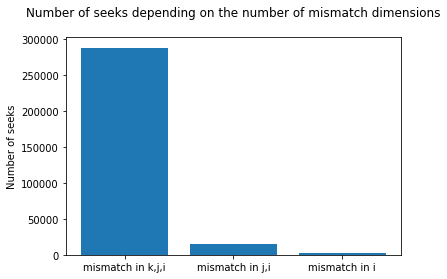

In [6]:
import matplotlib.pyplot as plt
plt.bar(list(cases.keys()), results)
plt.ylabel('Number of seeks')
plt.title('Number of seeks depending on the number of mismatch dimensions\n')

Text(0.5, 1.0, 'Percentage of seek gains depending on number of mismatch dimensions')

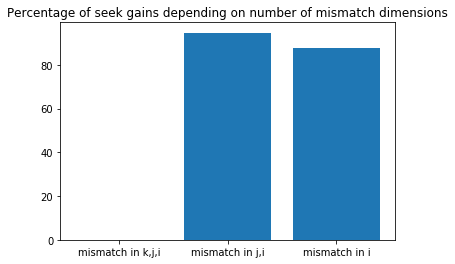

In [5]:
results2 = [0, 100 - (results[1] * 100 / results[0]), 100 - (results[2] * 100 / results[1])]
plt.bar(list(cases.keys()), results2)
plt.title('Percentage of seek gains depending on number of mismatch dimensions')